# **Preprocessing**


 ## Reading Dataset

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
df=pd.read_csv("/content/LoanStats3a.csv")
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0,47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,NaN,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648.0,83.70%,9.0,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.0,0.00,Jan-15,171.62,NaN,May-19,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,NaN,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687.0,9.40%,4.0,f,0.0,0.0,1014.530000,1014.53,456.46,435.17,0.00,122.9,1.11,Apr-13,119.66,NaN,Oct-16,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,NaN,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956.0,98.50%,10.0,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.0

In [49]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'orig_projected_additional_accrued_interest',
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'debt_settlement_flag', 'debt_settlement_flag_date',
       'settlement_status', 'settlement_date', 'settlement_amount',
       'settlement_percentage', 'settlement_term'],
      dtype='object', length=144)

In [50]:
pd.set_option('display.max_columns', None)
df.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,NaN,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648.0,83.70%,9.0,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.0,0.00,Jan-15,171.62,NaN,May-19,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,NaN,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687.0,9.40%,4.0,f,0.0,0.0,1014.530000,1014.53,456.46,435.17,0.0,122.9,1.11,Apr-13,119.66,NaN,Oct-16,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,NaN,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956.0,98.50%,10.0,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.0,0.0,0.

In [51]:
df.isnull().sum()


id                       42537
member_id                42538
loan_amnt                    3
funded_amnt                  3
funded_amnt_inv              3
                         ...  
settlement_status        42378
settlement_date          42378
settlement_amount        42378
settlement_percentage    42378
settlement_term          42378
Length: 144, dtype: int64

In [52]:
# Total percentage of null values in the data
(df.isnull().sum().sum())/(df.shape[0]*df.shape[1])

0.6313577141483955

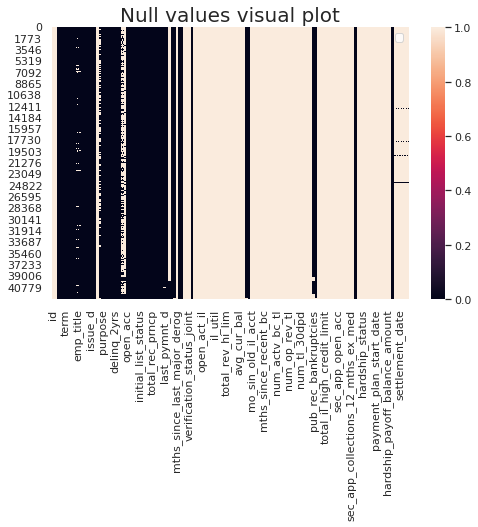

In [53]:
# Checking for null values using a heat map as a visualizing tool
sns.set(rc={'figure.figsize':(8,5)})
sns.set_style('whitegrid')
sns.heatmap(df.isnull())
plt.title('Null values visual plot',fontdict={'fontsize': 20})
plt.legend(df.isnull())
plt.show()

In [54]:
# Creating a dataframe to display percentage of null values in each column
a = pd.DataFrame()
a['Percentage of null values']=['10% or less','20% or less','30% or less','40% or less','50% or less','60% or less','70% or less']

ten_percent = len(df.columns[((df.isnull().sum())/len(df)) < 0.1])
twenty_percent = len(df.columns[((df.isnull().sum())/len(df)) < 0.2])
thirty_percent = len(df.columns[((df.isnull().sum())/len(df)) < 0.3])
fourty_percent = len(df.columns[((df.isnull().sum())/len(df)) < 0.4])
fifty_percent = len(df.columns[((df.isnull().sum())/len(df)) < 0.5])
sixty_percent = len(df.columns[((df.isnull().sum())/len(df)) < 0.6])
seventy_percent = len(df.columns[((df.isnull().sum())/len(df)) < 0.7])


a['No.of columns'] = [ten_percent,twenty_percent,thirty_percent,fourty_percent,fifty_percent,sixty_percent,seventy_percent]
a

,Percentage of null values,No.of columns
0,10% or less,52
1,20% or less,52
2,30% or less,52
3,40% or less,53
4,50% or less,53
5,60% or less,53
6,70% or less,54


## By considering columns with less number of null values, we were able to decrease total number of columns from 144 to 53.



In [55]:
# Considering only those columns which have null values less than 40% in that particular column
df = pd.read_csv('LoanStats3a.csv')
df = df[df.columns[((df.isnull().sum())/len(df)) < 0.4]]
df.shape

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0,47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(42538, 53)

## Understanding Features

In [56]:
# Instead of checking every column of 53 columns like above, here we are running a for loop on top of 'object' columns and take a decison based on the output of this cell.
for i in df.columns[df.dtypes == 'object']:
    print(df[i].value_counts())
    print('************************')

 36 months    31534
 60 months    11001
Name: term, dtype: int64
************************
10.99%    970
11.49%    837
13.49%    832
7.51%     787
7.88%     742
         ... 
17.46%      1
21.48%      1
24.40%      1
16.83%      1
16.20%      1
Name: int_rate, Length: 394, dtype: int64
************************
B    12389
A    10183
C     8740
D     6016
E     3394
F     1301
G      512
Name: grade, dtype: int64
************************
B3    2997
A4    2905
B5    2807
A5    2793
B4    2590
C1    2264
C2    2157
B2    2113
B1    1882
A3    1823
C3    1658
A2    1520
D2    1485
C4    1370
D3    1322
C5    1291
A1    1142
D4    1140
D1    1053
D5    1016
E1     884
E2     791
E3     668
E4     552
E5     499
F1     392
F2     308
F3     236
F4     211
F5     154
G1     141
G2     107
G4      99
G5      86
G3      79
Name: sub_grade, dtype: int64
************************
US Army                             139
Bank of America                     115
IBM                                  72
K

## Dropping unnecessary objects

In [57]:
# After observing the above output, we are dropping columns which are not important and which doesn't add value to our use case.

df.drop(['emp_title','pymnt_plan','desc','title', 'zip_code', 'addr_state', 'initial_list_status','application_type','hardship_flag','debt_settlement_flag'],axis=1,inplace=True)

## Checking Numerical Columns

In [58]:
# Checking some numerical columns
col = ['acc_now_delinq','chargeoff_within_12_mths','collections_12_mths_ex_med','delinq_amnt','policy_code','tax_liens']
for i in col:
    print(df[i].value_counts())
    print('************************')

0.0    42502
1.0        4
Name: acc_now_delinq, dtype: int64
************************
0.0    42390
Name: chargeoff_within_12_mths, dtype: int64
************************
0.0    42390
Name: collections_12_mths_ex_med, dtype: int64
************************
0.0       42504
27.0          1
6053.0        1
Name: delinq_amnt, dtype: int64
************************
1.0    42535
Name: policy_code, dtype: int64
************************
0.0    42429
1.0        1
Name: tax_liens, dtype: int64
************************


## Droping unnecessary columns

In [59]:
# There are also few not so useful numerical columns.We are dropping these numerical columns after examining them. 

df.drop(['acc_now_delinq','chargeoff_within_12_mths','collection_recovery_fee',
         'collections_12_mths_ex_med','delinq_amnt','policy_code','tax_liens'],axis=1,inplace=True)

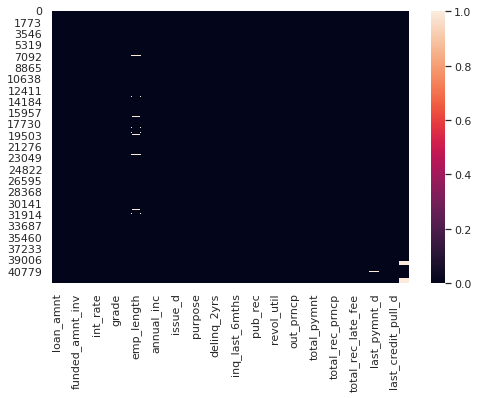

In [60]:
# Checking for null values in the updated dataframe
sns.heatmap(df.isnull())
plt.show()

In [61]:
df.isnull().sum()

loan_amnt                  3
funded_amnt                3
funded_amnt_inv            3
term                       3
int_rate                   3
installment                3
grade                      3
sub_grade                  3
emp_length              1115
home_ownership             3
annual_inc                 7
verification_status        3
issue_d                    3
loan_status                3
purpose                    3
dti                        3
delinq_2yrs               32
earliest_cr_line          32
inq_last_6mths            32
open_acc                  32
pub_rec                   32
revol_bal                  3
revol_util                93
total_acc                 32
out_prncp                  3
out_prncp_inv              3
total_pymnt                3
total_pymnt_inv            3
total_rec_prncp            3
total_rec_int              3
total_rec_late_fee         3
recoveries                 3
last_pymnt_d              86
last_pymnt_amnt            3
last_credit_pu

In [62]:

pd.set_option('display.max_columns', None)

df.head(2)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,27.65,0.0,Jan-85,1.0,3.0,0.0,13648.0,83.70%,9.0,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.0,Jan-15,171.62,May-19,0.0
1,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,1.00,0.0,Apr-99,5.0,3.0,0.0,1687.0,9.40%,4.0,0.0,0.0,1014.530000,1014.53,456.46,435.17,0.0,122.9,Apr-13,119.66,Oct-16,0.0


In [63]:
df.shape

(42538, 36)

In [64]:
df[df['out_prncp'] != df['out_prncp_inv']] # Both are same

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
39786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39787,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39788,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
# Checking for null values
# Percentage of null values
a = (df.isnull().sum()/df.shape[0])*100
b = a[a>0.05]
b = pd.DataFrame(b,columns=['Percentage of null values'])
b.sort_values(by=['Percentage of null values'],ascending=False)

,Percentage of null values
pub_rec_bankruptcies,3.215948
emp_length,2.621186
revol_util,0.218628
last_pymnt_d,0.202172
delinq_2yrs,0.075227
earliest_cr_line,0.075227
inq_last_6mths,0.075227
open_acc,0.075227
pub_rec,0.075227
total_acc,0.075227


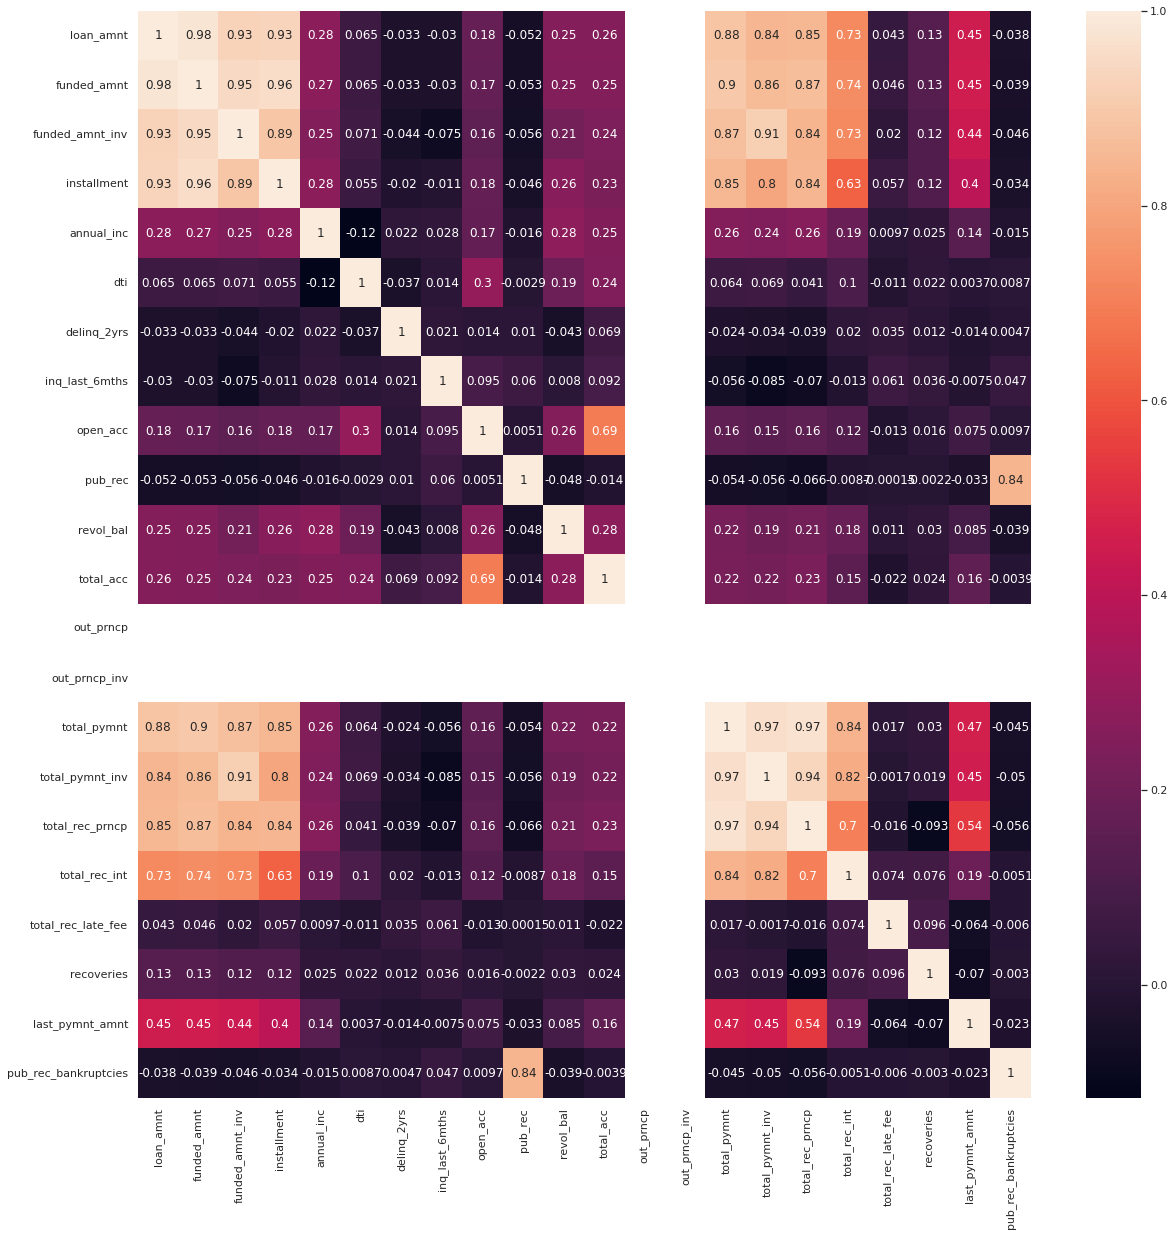

In [66]:
sns.set(rc={'figure.figsize':(20,20)})
sns.set_style('whitegrid')
# Heatmap
sns.heatmap(df.corr(),annot=True)
plt.show()

In [67]:
# Dropping those columns to avoid multi-collinearity
df.drop('out_prncp_inv',axis=1,inplace = True)
df.drop('out_prncp',axis=1,inplace = True)

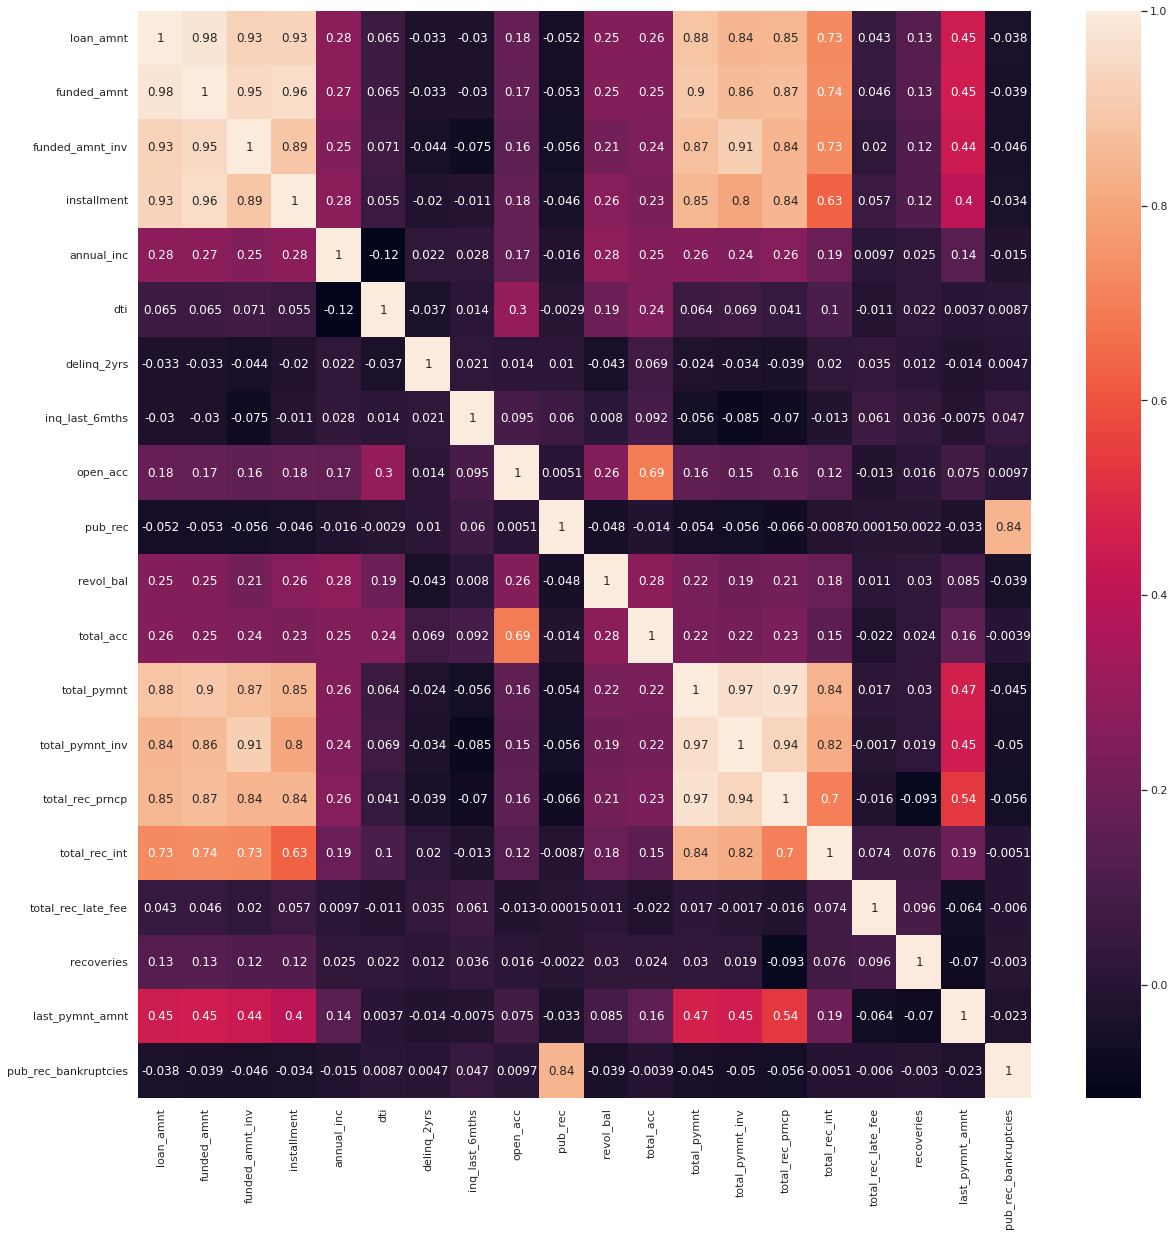

In [68]:
# Checking correlation  and using heatmap to visualise it.
sns.set(rc={'figure.figsize':(20,20)})
sns.set_style('whitegrid')
# Heatmap
sns.heatmap(df.corr(),annot=True)
plt.show()

In [69]:
df.dropna(how='all',inplace=True) 

In [70]:
df.isnull().sum()

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length              1112
home_ownership             0
annual_inc                 4
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
dti                        0
delinq_2yrs               29
earliest_cr_line          29
inq_last_6mths            29
open_acc                  29
pub_rec                   29
revol_bal                  0
revol_util                90
total_acc                 29
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
total_rec_late_fee         0
recoveries                 0
last_pymnt_d              83
last_pymnt_amnt            0
last_credit_pull_d         4
pub_rec_bankruptcies    1365
dtype: int64

In [71]:
df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_amnt,pub_rec_bankruptcies
count,42535.000000,42535.000000,42535.000000,42535.000000,4.253100e+04,42535.000000,42506.000000,42506.000000,42506.000000,42506.000000,4.253500e+04,42506.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,41170.000000
mean,11089.722581,10821.585753,10139.938785,322.623063,6.913656e+04,13.373043,0.152449,1.081424,9.343951,0.058156,1.429786e+04,22.124406,12020.414206,11312.953251,9675.675936,2239.981444,1.516890,103.240029,2613.245652,0.045227
std,7410.938391,7146.914675,7131.598014,208.927216,6.409635e+04,6.726315,0.512406,1.527455,4.496274,0.245713,2.201844e+04,11.592811,9094.890303,9038.639113,7105.750304,2585.057393,7.830064,737.171320,4385.066535,0.208737
min,500.000000,500.000000,0.000000,15.670000,1.896000e+03,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5200.000000,5000.000000,4950.000000,165.520000,4.000000e+04,8.200000,0.000000,0.000000,6.000000,0.000000,3.635000e+03,13.000000,5465.685189,4793.115000,4400.000000,657.100000,0.000000,0.000000,211.050000,0.000000
50%,9700.000000,9600.000000,8500.000000,277.690000,5.900000e+04,13.470000,0.000000,1.000000,9.000000,0.000000,8.821000e+03,20.000000,9682.251696,8956.080000,8000.000000,1339.160000,0.000000,0.000000,528.360000,0.000000
75%,15000.000000,15000.000000,14000.000000,428.180000,8.250000e+04,18.680000,0.000000,2.000000,12.000000,0.000000,1.725100e+04,29.000000,16427.850065,15544.335000,13499.995000,2803.090000,0.000000,0.000000,3170.220000,0.000000
max,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,13.000000,33.000000,47.000000,5.000000,1.207359e+06,90.000000,58886.473430,58563.680000,35000.020000,23886.470000,209.000000,29623.350000,36115.200000,2.000000


In [72]:
df=df[df['earliest_cr_line']!= 'Nan']

In [73]:
# Converting objects to datetime columns
col = ['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d']
for i in col:
    df[i] = pd.to_datetime(df[i].astype('str'), format='%b-%y', yearfirst=False)

In [74]:
# Checking the new datetime columns
df[['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d']]

,issue_d,earliest_cr_line,last_pymnt_d,last_credit_pull_d
0,2011-12-01,1985-01-01,2015-01-01,2019-05-01
1,2011-12-01,1999-04-01,2013-04-01,2016-10-01
2,2011-12-01,2001-11-01,2014-06-01,2017-06-01
3,2011-12-01,1996-02-01,2015-01-01,2016-04-01
4,2011-12-01,1996-01-01,2017-01-01,2018-04-01
...,...,...,...,...
42533,2007-06-01,NaT,2008-03-01,2013-02-01
42534,2007-06-01,NaT,2010-06-01,2014-09-01
42535,2007-06-01,NaT,2010-06-01,2007-05-01
42536,2007-06-01,NaT,2010-06-01,2007-08-01


## One hot Encoding

In [75]:
# One hot encoding on categorical columns
df = pd.get_dummies(df,columns = ['home_ownership','verification_status','purpose'],drop_first = True)

In [76]:
df

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,annual_inc,issue_d,loan_status,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,10+ years,24000.0,2011-12-01,Fully Paid,27.65,0.0,1985-01-01,1.0,3.0,0.0,13648.0,83.70%,9.0,5863.155187,5833.84,5000.00,863.16,0.00,0.0,2015-01-01,171.62,2019-05-01,0.0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
1,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,30000.0,2011-12-01,Charged Off,1.00,0.0,1999-04-01,5.0,3.0,0.0,1687.0,9.40%,4.0,1014.530000,1014.53,456.46,435.17,0.00,122.9,2013-04-01,119.66,2016-10-01,0.0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,10+ years,12252.0,2011-12-01,Fully Paid,8.72,0.0,2001-11-01,2.0,2.0,0.0,2956.0,98.50%,10.0,3005.666844,3005.67,2400.00,605.67,0.00,0.0,2014-06-01,649.91,2017-06-01,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,10+ years,49200.0,2011-12-01,Fully Paid,20.00,0.0,1996-02-01,1.0,10.0,0.0,5598.0,21%,37.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.0,2015-01-01,357.48,2016-04-01,0.0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,1 year,80000.0,2011-12-01,Fully Paid,17.94,0.0,1996-01-01,0.0,15.0,0.0,27783.0,53.90%,38.0,4066.908161,4066.91,3000.00,1066.91,0.00,0.0,2017-01-01,67.30,2018-04-01,0.0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42533,3500.0,3500.0,225.0,36 months,10.28%,113.39,C,C1,< 1 year,180000.0,2007-06-01,Does not meet the credit policy. Status:Fully ...,10.00,NaN,NaT,NaN,NaN,NaN,0.0,NaN,NaN,3719.431070,239.11,3500.00,219.43,0.00,0.0,2008-03-01,0.00,2013-02-01,NaN,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
42534,1000.0,1000.0,0.0,36 months,9.64%,32.11,B,B4,< 1 year,12000.0,2007-06-01,Does not meet the credit policy. Status:Fully ...,10.00,NaN,NaT,NaN,NaN,NaN,0.0,NaN,NaN,1155.600899,0.00,1000.00,155.60,0.00,0.0,2010-06-01,32.41,2014-09-01,NaN,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
42535,2525.0,2525.0,225.0,36 months,9.33%,80.69,B,B3,< 1 year,110000.0,2007-06-01,Does not meet the credit policy. Status:Fully ...,10.00,NaN,NaT,NaN,NaN,NaN,0.0,NaN,NaN,2904.498829,258.82,2525.00,379.50,0.00,0.0,2010-06-01,82.03,2007-05-01,NaN,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
42536,6500.0,6500.0,0.0,36 months,8.38%,204.84,A,A5,< 1 year,NaN,2007-06-01,Does not meet the credit policy. Status:Fully ...,4.00,NaN,NaT,NaN,NaN,NaN,0.0,NaN,NaN,7373.904962,0.00,6500.00,873.90,0.00,0.0,2010-06-01,205.32,2007-08-01,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


## Label Encoding

In [77]:
# Label encoding on grade column
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df.grade)
le.classes_

array(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype=object)

In [78]:
df.grade = le.transform(df.grade)

## Converting DateTime columns to numerical columns:



In [79]:
df['issue_d']

0       2011-12-01
1       2011-12-01
2       2011-12-01
3       2011-12-01
4       2011-12-01
           ...    
42533   2007-06-01
42534   2007-06-01
42535   2007-06-01
42536   2007-06-01
42537   2007-06-01
Name: issue_d, Length: 42535, dtype: datetime64[ns]

In [80]:
df['issue_d']

0       2011-12-01
1       2011-12-01
2       2011-12-01
3       2011-12-01
4       2011-12-01
           ...    
42533   2007-06-01
42534   2007-06-01
42535   2007-06-01
42536   2007-06-01
42537   2007-06-01
Name: issue_d, Length: 42535, dtype: datetime64[ns]

In [81]:
df['last_pymnt_d']

0       2015-01-01
1       2013-04-01
2       2014-06-01
3       2015-01-01
4       2017-01-01
           ...    
42533   2008-03-01
42534   2010-06-01
42535   2010-06-01
42536   2010-06-01
42537   2010-06-01
Name: last_pymnt_d, Length: 42535, dtype: datetime64[ns]

In [82]:
df['earliest_cr_line']

0       1985-01-01
1       1999-04-01
2       2001-11-01
3       1996-02-01
4       1996-01-01
           ...    
42533          NaT
42534          NaT
42535          NaT
42536          NaT
42537          NaT
Name: earliest_cr_line, Length: 42535, dtype: datetime64[ns]

In [83]:
"""from datetime import date, timedelta
df.loc[df['earliest_cr_line'].isnull(), 'earliest_cr_line'] = df['earliest_cr_line'] - timedelta(2019)"""
df['earliest_cr_line'] = pd.DatetimeIndex(df['earliest_cr_line']).year  

In [84]:
# Adding new features by getting month and year from issue_d,last_pymnt_d and last_credit_pull_d columns
df['issue_d_year'] = pd.DatetimeIndex(df['issue_d']).year  
df['issue_d_month'] = pd.DatetimeIndex(df['issue_d']).month  
df['last_pymnt_d_year'] = pd.DatetimeIndex(df['last_pymnt_d']).year  
df['last_pymnt_d_month'] = pd.DatetimeIndex(df['last_pymnt_d']).month 
df['last_credit_pull_d_year'] = pd.DatetimeIndex(df['last_credit_pull_d']).year  
df['last_credit_pull_d_month'] = pd.DatetimeIndex(df['last_credit_pull_d']).month 

df.earliest_cr_line = 2019- (df.earliest_cr_line)
df.issue_d_year = 2019 - (df.issue_d_year)

df.last_pymnt_d_year = 2019 - (df.last_pymnt_d_year)
df.last_credit_pull_d_year = 2019 - (df.last_credit_pull_d_year)

In [85]:
df.last_credit_pull_d_year 

0         0.0
1         3.0
2         2.0
3         3.0
4         1.0
         ... 
42533     6.0
42534     5.0
42535    12.0
42536    12.0
42537     4.0
Name: last_credit_pull_d_year, Length: 42535, dtype: float64

## Converting objects to numerical columns:



In [86]:
df.term

0         36 months
1         60 months
2         36 months
3         36 months
4         60 months
            ...    
42533     36 months
42534     36 months
42535     36 months
42536     36 months
42537     36 months
Name: term, Length: 42535, dtype: object

In [87]:
#df['term']=df['term'].apply(lambda x: str(x)[:2])
df['term'] = df.loc[df['term'].notna(), 'term'].apply(lambda x: x[:2])
df.term = df.loc[df['term'].notna(), 'term'].astype('float')
df['int_rate'] = df.loc[df['int_rate'].notna(), 'int_rate'].apply(lambda x: x[:2])
df['int_rate'] = df.loc[df['int_rate'].notna(), 'int_rate'].astype('float')

In [88]:
# Label encoding on grade column
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df.sub_grade)
le.classes_

array(['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1',
       'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3',
       'G4', 'G5'], dtype=object)

In [89]:
df.sub_grade = le.transform(df.sub_grade)

## Checking correlation

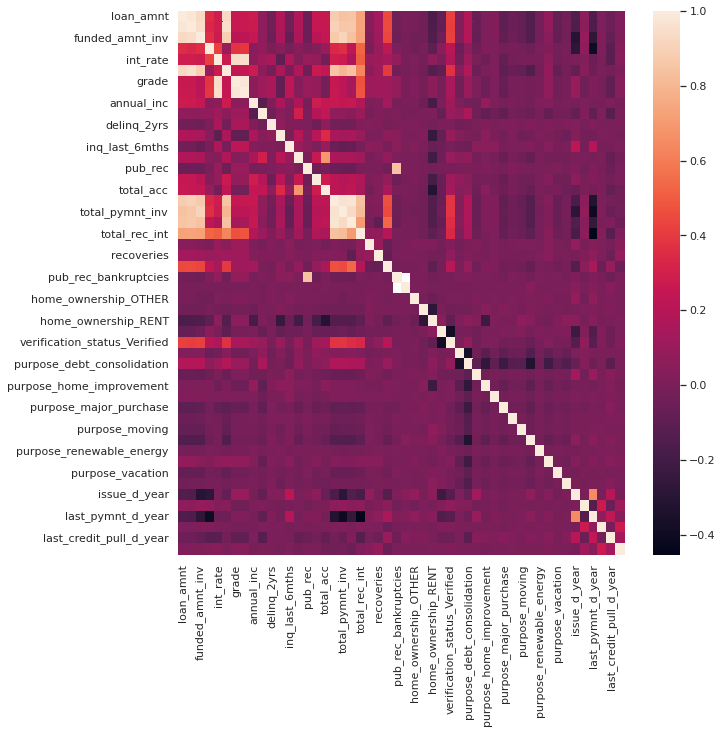

In [90]:
# Checking correlation  and using heatmap to visualise it.
sns.set(rc={'figure.figsize':(10,10)})
sns.set_style('whitegrid')
# Heatmap
sns.heatmap(df.corr())
plt.show()

## Dealing with null values:

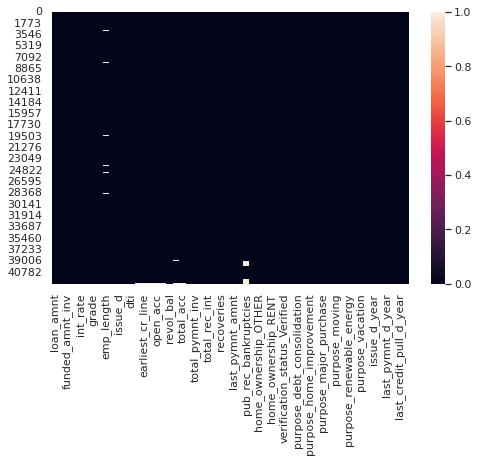

In [91]:
# Checking for null values in the updated dataframe
sns.set(rc={'figure.figsize':(8,5)})
sns.heatmap(df.isnull())
plt.show()

In [92]:
# Checking for null values
# Percentage of null values
a = (df.isnull().sum()/df.shape[0])*100
b = a[a>0.05]
b = pd.DataFrame(b,columns=['Percentage of null values'])
b.sort_values(by=['Percentage of null values'],ascending=False)

,Percentage of null values
pub_rec_bankruptcies,3.209122
emp_length,2.614318
revol_util,0.211590
last_pymnt_d,0.195133
last_pymnt_d_year,0.195133
last_pymnt_d_month,0.195133
delinq_2yrs,0.068179
earliest_cr_line,0.068179
inq_last_6mths,0.068179
open_acc,0.068179


In [93]:
df = df[df['delinq_2yrs'].notnull()]

In [94]:
df.isnull().sum()

loan_amnt                                 0
funded_amnt                               0
funded_amnt_inv                           0
term                                      0
int_rate                                  0
installment                               0
grade                                     0
sub_grade                                 0
emp_length                             1112
annual_inc                                0
issue_d                                   0
loan_status                               0
dti                                       0
delinq_2yrs                               0
earliest_cr_line                          0
inq_last_6mths                            0
open_acc                                  0
pub_rec                                   0
revol_bal                                 0
revol_util                               61
total_acc                                 0
total_pymnt                               0
total_pymnt_inv                 

In [95]:
# As the null values in these columns are less than 0.5% of the size, we are simply imputing null values with median.
df['last_pymnt_d_year'].fillna(df['last_pymnt_d_year'].median(),inplace=True)
df['last_pymnt_d_month'].fillna(df['last_pymnt_d_month'].median(),inplace=True)
df['last_credit_pull_d_year'].fillna(df['last_credit_pull_d_year'].median(),inplace=True)
df['last_credit_pull_d_month'].fillna(df['last_credit_pull_d_month'].median(),inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inpla

In [96]:
# Filling null values with median(string) which is close to 50.
df.revol_util.fillna('50%',inplace=True)  

# Converting string to float
df.revol_util = df.revol_util.apply(lambda x:x[:-1])
df.revol_util = df.revol_util.astype('float')

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [97]:
df.pub_rec_bankruptcies.value_counts()

0.0    39316
1.0     1846
2.0        8
Name: pub_rec_bankruptcies, dtype: int64

In [98]:
df.drop(['issue_d','last_pymnt_d','last_credit_pull_d'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [99]:
# pub_rec_bankruptcies column is highly imbalanced.
#So, it is better to fill it with median(0) as even after building model the model will be skewed very much towards 0.
df['pub_rec_bankruptcies'].fillna(df['pub_rec_bankruptcies'].median(),inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [100]:
# seperating null values by assigning a random string
df['emp_length'].fillna('5000',inplace=True) 
# Filling less than one year as 0 years of experience
df.emp_length.replace({'10+ years':'10 years','< 1 year':'0 years'},inplace=True) 
# Converting it's dtype to float
df.emp_length = df.emp_length.apply(lambda x:x[:2])
df.emp_length = df.emp_length.astype('float')

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

In [101]:
# Building models to fill null values in emp_length columns
df2 = df.drop('loan_status',axis=1)
df2_train = df2[df2['emp_length'] !=50]
df2_test = df2[df2['emp_length'] ==50]

In [102]:
# Assigning train and test to variables
x_train = df2_train.drop('emp_length',axis=1)
y_train = df2_train.emp_length
x_test = df2_test.drop('emp_length',axis=1)

In [103]:
df2_train.drop('emp_length',axis=1)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,annual_inc,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_amnt,pub_rec_bankruptcies,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,issue_d_year,issue_d_month,last_pymnt_d_year,last_pymnt_d_month,last_credit_pull_d_year,last_credit_pull_d_month
0,5000.0,5000.0,4975.0,3.0,10.0,162.87,1,6,24000.0,27.65,0.0,34.0,1.0,3.0,0.0,13648.0,83.7,9.0,5863.155187,5833.84,5000.00,863.16,0.00,0.0,171.62,0.0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,8,12,4.0,1.0,0.0,5.0
1,2500.0,2500.0,2500.0,6.0,15.0,59.83,2,13,30000.0,1.00,0.0,20.0,5.0,3.0,0.0,1687.0,9.4,4.0,1014.530000,1014.53,456.46,435.17,0.00,122.9,119.66,0.0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,12,6.0,4.0,3.0,10.0
2,2400.0,2400.0,2400.0,3.0,15.0,84.33,2,14,12252.0,8.72,0.0,18.0,2.0,2.0,0.0,2956.0,98.5,10.0,3005.666844,3005.67,2400.00,605.67,0.00,0.0,649.91,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,8,12,5.0,6.0,2.0,6.0
3,10000.0,10000.0,10000.0,3.0,13.0,339.31,2,10,49200.0,20.00,0.0,23.0,1.0,10.0,0.0,5598.0,21.0,37.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.0,357.48,0.0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,8,12,4.0,1.0,3.0,4.0
4,3000.0,3000.0,3000.0,6.0,12.0,67.79,1,9,80000.0,17.94,0.0,23.0,0.0,15.0,0.0,27783.0,53.9,38.0,4066.908161,4066.91,3000.00,1066.91,0.00,0.0,67.30,0.0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,8,12,2.0,1.0,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42511,5350.0,5350.0,625.0,3.0,13.0,180.57,3,19,4000.0,15.00,0.0,13.0,1.0,1.0,0.0,0.0,50.0,1.0,6486.773238,757.80,5350.00,1121.77,15.00,0.0,1056.94,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,7,9.0,2.0,6.0,7.0
42513,10000.0,10000.0,350.0,3.0,14.0,345.18,4,24,50000.0,7.22,2.0,20.0,0.0,14.0,0.0,10025.0,85.0,20.0,12622.317950,441.78,10000.00,2570.54,51.78,0.0,1605.65,0.0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,12,7,9.0,8.0,9.0,8.0
42514,2000.0,2000.0,1275.0,3.0,7.0,61.87,0,0,150000.0,5.60,0.0,35.0,0.0,7.0,0.0,150786.0,2.2,16.0,2227.023184,1419.73,2000.00,227.02,0.00,0.0,63.59,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,12,7,9.0,7.0,9.0,6.0
42515,6000.0,6000.0,650.0,3.0,10.0,195.28,2,11,20000.0,12.90,0.0,23.0,4.0,5.0,0.0,13660.0,66.0,6.0,7029.871272,761.57,6000.00,1029.87,0.00,0.0,197.36,0.0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,12,6,9.0,6.0,5.0,10.0


In [104]:
# We are running a decision tree classifier to predict the missing values in 'emp_length' column
from sklearn.tree import DecisionTreeClassifier
giniDecisionTree = DecisionTreeClassifier(criterion='gini',random_state = 100,max_depth=3, min_samples_leaf=5)

giniDecisionTree.fit(df2_train.drop('emp_length',axis=1), y_train)
giniPred = giniDecisionTree.predict(x_test)

In [106]:
df.emp_length.replace({50:giniPred},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [107]:
# Last check to find if there are any null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42506 entries, 0 to 42516
Data columns (total 53 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   loan_amnt                            42506 non-null  float64
 1   funded_amnt                          42506 non-null  float64
 2   funded_amnt_inv                      42506 non-null  float64
 3   term                                 42506 non-null  float64
 4   int_rate                             42506 non-null  float64
 5   installment                          42506 non-null  float64
 6   grade                                42506 non-null  int64  
 7   sub_grade                            42506 non-null  int64  
 8   emp_length                           42506 non-null  float64
 9   annual_inc                           42506 non-null  float64
 10  loan_status                          42506 non-null  object 
 11  dti                         

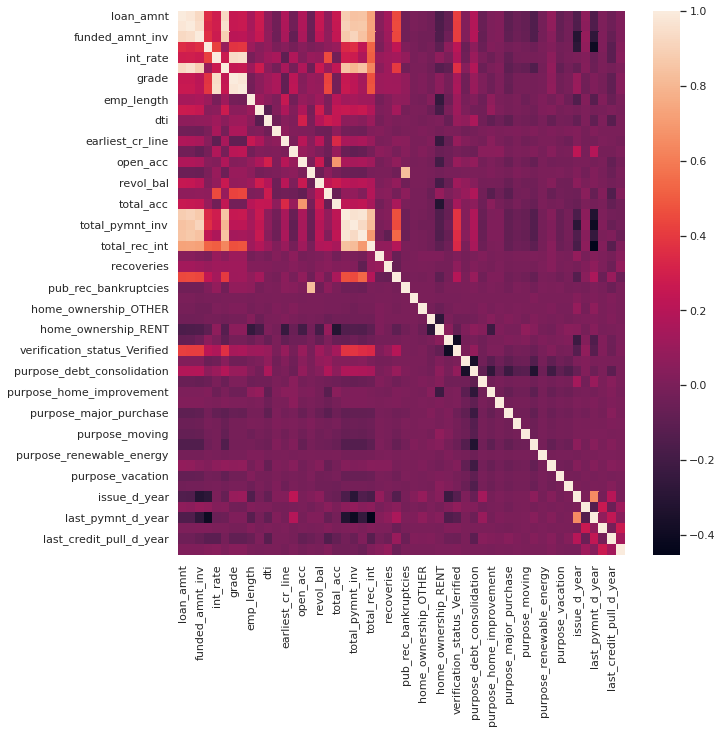

In [108]:
# Heatmap of correlation of the final dataframe
sns.set(rc={'figure.figsize':(10,10)})
sns.set_style('whitegrid')

sns.heatmap(df.corr())
plt.show()

In [109]:
df.shape


(42506, 53)

# Finally Classification

In [110]:
df.loan_status.unique()

array(['Fully Paid', 'Charged Off',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [111]:
y = df['loan_status'] # target variable

y.value_counts()

Fully Paid                                             34116
Charged Off                                             5670
Does not meet the credit policy. Status:Fully Paid      1962
Does not meet the credit policy. Status:Charged Off      758
Name: loan_status, dtype: int64

In [112]:
# Label encoding the target variable
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y)
y= le.transform(y)
y

array([3, 0, 3, ..., 2, 2, 2])

In [113]:
# All these columns are based on future transactions(We only want data that contains info before charging off a loan)

df.drop(['total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int',
        'total_rec_late_fee','recoveries'],inplace=True,axis=1)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [114]:
# Checking for multi-collinearity between features

df2 = df.drop('loan_status',axis=1)
 
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(df2.values, i) for i in range(df2.shape[1])]
a = pd.DataFrame({'vif': vif[:]}, index=df2.columns)
a[a['vif']>15]

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,vif
loan_amnt,94.227608
funded_amnt,288.342469
funded_amnt_inv,40.718445
term,43.839407
int_rate,115.868386
installment,145.444141
grade,63.218989
sub_grade,106.079879
issue_d_year,122.188571
last_pymnt_d_year,44.206532


In [115]:
# Dropping columns that are highly correlated
df2.drop(['grade','issue_d_year','funded_amnt','term','installment','loan_amnt','int_rate','last_pymnt_d_year'],axis=1,inplace=True) # No need to remove

In [116]:
df = df2

In [117]:
# Final shape of the dataframe
df.shape

(42506, 38)

## Model Building

In [118]:
# Dividing the data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df,y,test_size = 0.20 ,random_state = 2, stratify =y)

x_train.shape,y_train.shape,x_test.shape,y_test.shape

((34004, 38), (34004,), (8502, 38), (8502,))

In [119]:
# Base model
from sklearn.tree import DecisionTreeClassifier
giniDecisionTree = DecisionTreeClassifier(criterion='gini',random_state = 100,max_depth=3,class_weight='balanced', min_samples_leaf=5)

giniDecisionTree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=3, min_samples_leaf=5,
                       random_state=100)

In [121]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report

giniPred = giniDecisionTree.predict(x_test)

print('Accuracy Score: ',accuracy_score(y_test, giniPred))

Accuracy Score:  0.6706657257115972


In [122]:
##  Checking classification_report

print('Classification Report')
print(classification_report(y_test, giniPred))

Classification Report
              precision    recall  f1-score   support

           0       0.30      0.91      0.46      1134
           1       0.43      0.68      0.53       152
           2       0.53      0.51      0.52       392
           3       0.97      0.64      0.77      6824

    accuracy                           0.67      8502
   macro avg       0.56      0.69      0.57      8502
weighted avg       0.85      0.67      0.71      8502



In [123]:
# Tuning the parameters to find the best decision tree model.
model = DecisionTreeClassifier(criterion='gini',random_state = 100,class_weight='balanced')

param_dist = {'max_depth': [2, 3, 4,5,6,7,8,9], 'min_samples_leaf' : [2,3,4,5,6,7,8]}

from sklearn.model_selection import GridSearchCV
cv_dt = GridSearchCV(model, cv = 3,param_grid=param_dist, n_jobs = -1)

cv_dt.fit(x_train, y_train)
print('Best Parameters using grid search: \n', cv_dt.best_params_)


Best Parameters using grid search: 
 {'max_depth': 9, 'min_samples_leaf': 2}


In [124]:
# Training with the best parameters

model = DecisionTreeClassifier(criterion='gini',random_state = 100,max_depth=9,class_weight='balanced', min_samples_leaf=2)
model.fit(x_train, y_train)
giniPred = model.predict(x_test)

print('Accuracy Score: ',accuracy_score(y_test, giniPred))

Accuracy Score:  0.7860503410962126


In [125]:
##  Checking classification_report
print('Classification Report')
print(classification_report(y_test, giniPred))

Classification Report
              precision    recall  f1-score   support

           0       0.42      0.80      0.55      1134
           1       0.44      0.76      0.56       152
           2       0.56      0.71      0.63       392
           3       0.97      0.79      0.87      6824

    accuracy                           0.79      8502
   macro avg       0.60      0.76      0.65      8502
weighted avg       0.86      0.79      0.81      8502



DT: 0.336843 (0.013850)
RandomForest: 0.274497 (0.011275)
Bagged: 0.104341 (0.000796)
AdaBoost: 0.129308 (0.003832)
GradientBoost: 0.107223 (0.001297)


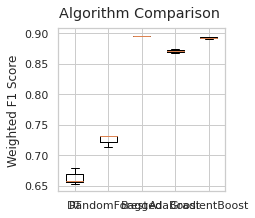

In [128]:
# Trying few more ML algos to find the best fit model
# Importing libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn import model_selection
sns.set(rc={'figure.figsize':(3,3)})
sns.set_style('whitegrid')


import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings(action='ignore', category=FutureWarning)


DT=DecisionTreeClassifier(criterion='gini',random_state = 100,max_depth=5,class_weight='balanced', min_samples_leaf=5)
RF=RandomForestClassifier(criterion='gini',random_state = 100,max_depth=5,class_weight='balanced', min_samples_leaf=5,n_estimators=20)
Bagged=BaggingClassifier(n_estimators=50)
AdaBoost=AdaBoostClassifier(n_estimators=50)
GBoost=GradientBoostingClassifier(n_estimators=50)
models = []

models.append(('DT',DT))
models.append(('RandomForest',RF))
models.append(('Bagged',Bagged))
models.append(('AdaBoost',AdaBoost))
#models.append(('AdaBoostRF',AB_RF))
models.append(('GradientBoost',GBoost))

# evaluating each model in turn using KFold CV with 3 splits
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(shuffle=True,n_splits=3,random_state=0)
	cv_results = model_selection.cross_val_score(model, x_train, y_train,cv=kfold, scoring='f1_micro')
	results.append(cv_results)
	names.append(name)
	print("%s: %f (%f)" % (name, 1-np.mean(cv_results),np.std(cv_results,ddof=1)))
   # boxplot algorithm comparison
fig = plt.figure()
sns.set_style('whitegrid')
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
sns.set(rc={'figure.figsize':(10,10)})
plt.xticks(rotation='horizontal')
plt.ylabel('Weighted F1 Score')
ax.set_xticklabels(names)
plt.show()

In [129]:
# Fitting the final model and checking it's accuracy
final_model = BaggingClassifier(n_estimators=16)
final_model.fit(x_train, y_train)
predicted = final_model.predict(x_test)
print('Accuracy Score: ',accuracy_score(y_test, predicted))

Accuracy Score:  0.8977887555869207


In [130]:
# Checking classification_report
print('Classification Report')
print(classification_report(y_test, predicted))

Classification Report
              precision    recall  f1-score   support

           0       0.75      0.63      0.68      1134
           1       0.68      0.62      0.65       152
           2       0.77      0.70      0.73       392
           3       0.93      0.96      0.94      6824

    accuracy                           0.90      8502
   macro avg       0.78      0.73      0.75      8502
weighted avg       0.89      0.90      0.89      8502



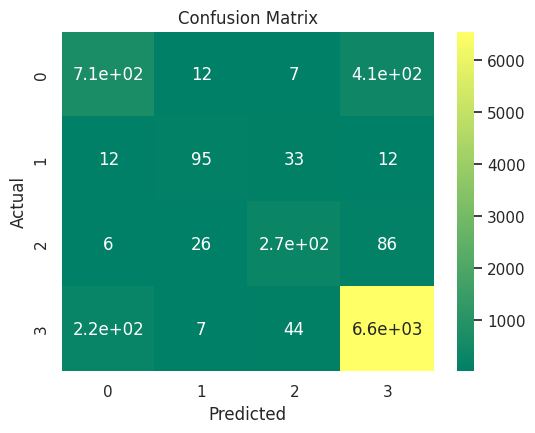

In [132]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib
sns.set(rc={'figure.figsize':(6,4.5)})
matplotlib.rcParams["figure.dpi"] = 100


cm = confusion_matrix(y_test,predicted)
sns.heatmap(cm, annot=True,cmap="summer"); #annot=True to annotate cells
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [133]:
# Using a decison tree to find the most important features as bagging clasifier doesn't have one.

model = DecisionTreeClassifier(criterion='gini',random_state = 100,max_depth=9,class_weight='balanced', min_samples_leaf=2)
model.fit(x_train, y_train)
giniPred = model.predict(x_test)

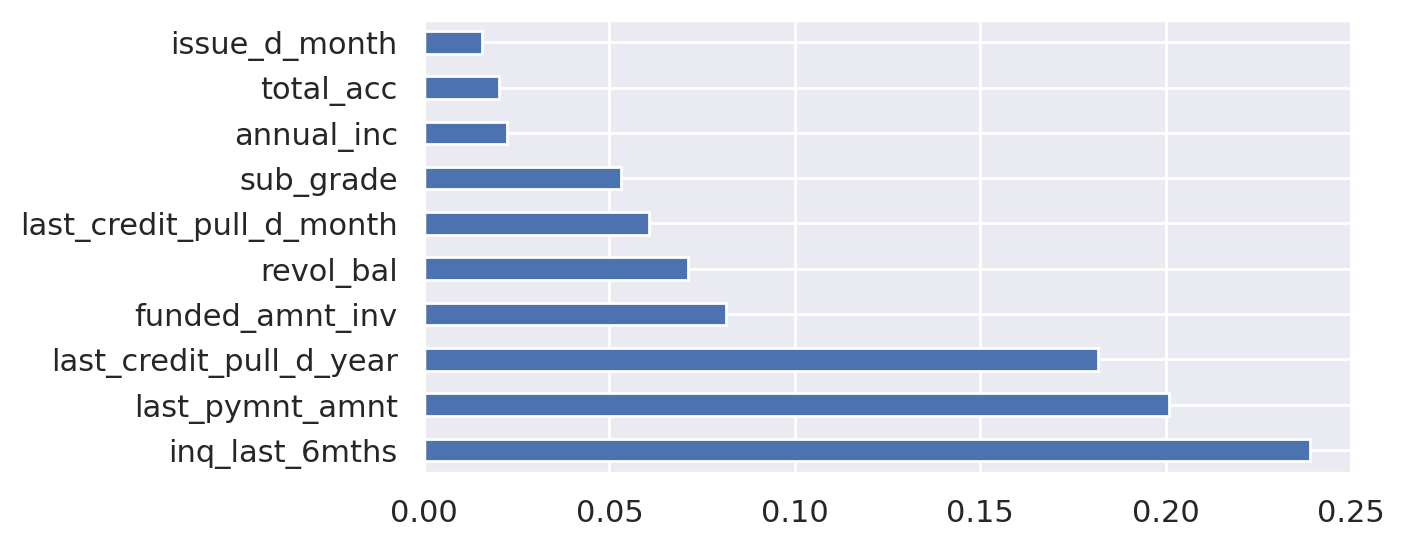

In [134]:
import matplotlib
sns.set(rc={'figure.figsize':(6,3)})
#sns.set_style('whitegrid')

matplotlib.rcParams["figure.dpi"] = 200
feat_importances = pd.Series(model.feature_importances_, index=df.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.savefig('feature_imp.png', dpi=100)
plt.show()